# ML Course
### Assignment - 4
## Student:
1. Idan Noyshul
2. Sapir Gilany 

## Kaggle
[Kaggle Profile](https://www.kaggle.com/idannoyshul)

<img src="kaggle.png" alt="Image Description" width="900">

## Models Used  
- **Random Forest Regressor**   
  - An ensemble of decision trees using **Bagging** to reduce overfitting.  

- **K-Nearest Neighbors (KNN) with Bagging**   
  - A distance-based model combined with **BaggingRegressor** to improve stability.  

- **Support Vector Regression (SVR)**   
  - A kernel-based approach optimized with **GridSearchCV**.  

- **Gradient Boosting Regressor**  
  - A boosting algorithm that builds sequential trees, improving predictions at each step.  

## PCA: Dimensionality Reduction  
To analyze the impact of **Principal Component Analysis (PCA)**, we compare models trained:  
 **With PCA**: Using reduced-dimensional features.  
 **Without PCA**: Using original numerical features.  

##  Ensemble Learning: Bagging vs. Boosting  
- **Bagging (Bootstrap Aggregating)**  
- **Boosting:**  
  - Used in **Gradient Boosting**, where each model learns from errors made by the previous one.  

##  Goal  
We compare the performance of these models using **Root Mean Squared Error (RMSE)** to determine the best approach for house price prediction.  


In [59]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error , make_scorer 
from sklearn.model_selection import train_test_split,  RandomizedSearchCV , GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import pandas as pd
import seaborn as sns 

In [60]:
house_df = pd.read_csv('train.csv')

In [61]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Investigation and Preprocessing

In [62]:
house_df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
display(house_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [64]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Preprocessing
### Checking for missing values
Identify columns with missing data and decide how to handle them by filling with appropriate values (e.g., median) or dropping if necessary.

In [65]:
house_df.isna().any() # check if there are Nan values

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [66]:
house_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [67]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
house_df[['MiscFeature', 'MiscVal']].head(20) ## trying to see why so many null

,MiscFeature,MiscVal
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,Shed,700
6,NaN,0
7,Shed,350
8,NaN,0
9,NaN,0


## Data Visualization 
We want to:

- See how the target depends on each feature
- Detect the most meaningful features in this dataset.

### Investigation 'SalePrice' Column: 

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

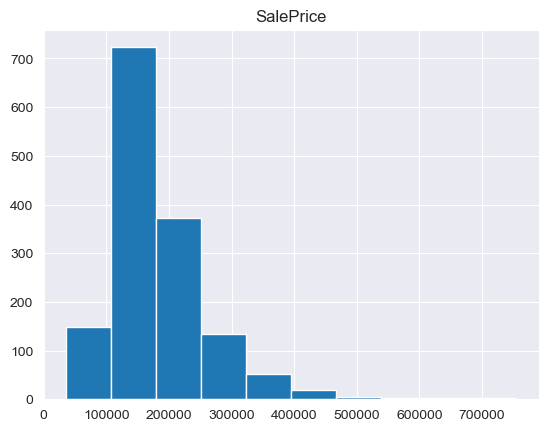

In [69]:
house_df.hist('SalePrice', bins=10)

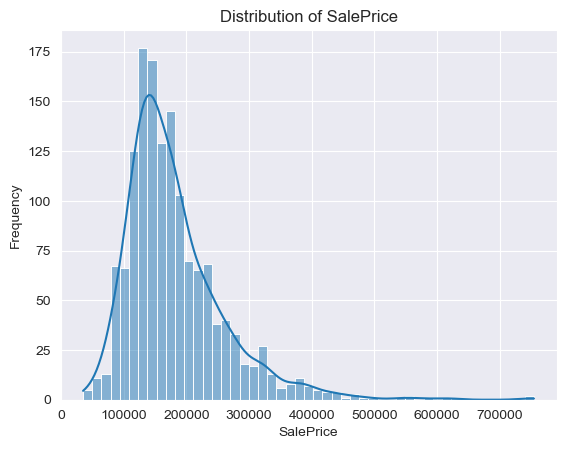

In [70]:
sns.histplot(house_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [71]:
house_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Box Plot

The box plot shows that most sale prices range between 100,000 and 300,000 Dollars, but there are a few properties with significantly higher prices, pulling the distribution’s tail upward.


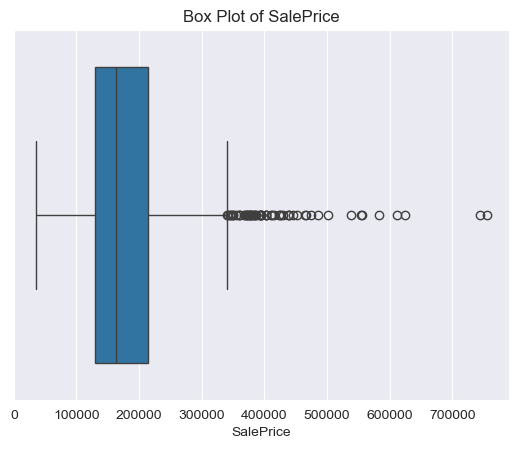

In [72]:
sns.boxplot(x=house_df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.show()

In [73]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]


In [74]:
outlier_count = count_outliers(house_df, 'SalePrice')
print(f"Number of outliers in 'SalePrice': {outlier_count}")

Number of outliers in 'SalePrice': 61


In [75]:
precent = outlier_count / len(house_df['SalePrice']) * 100
print(f"There is {precent:.2f}% of out layers in SalePrice")

There is 4.18% of out layers in SalePrice


Identify features in the DataFrame with outliers below a 4% of outlays 

In [76]:
def find_low_outlier_feature(df, threshold=4):
    low_outlier_features = []
    
    for column in df.columns:
        outlier_count = count_outliers(df, column)  # Use the provided function
        outlier_percentage = (outlier_count / df.shape[0]) * 100  # Calculate percentage
        
        if outlier_percentage < threshold:
            low_outlier_features.append(column)
    
    return low_outlier_features

# Example usage
numeric = house_df.select_dtypes(include=['float64', 'int64'])
low_outlier_features = find_low_outlier_feature(numeric, threshold=4)
print("Features with less than 4% outliers:", low_outlier_features)

Features with less than 4% outliers: ['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


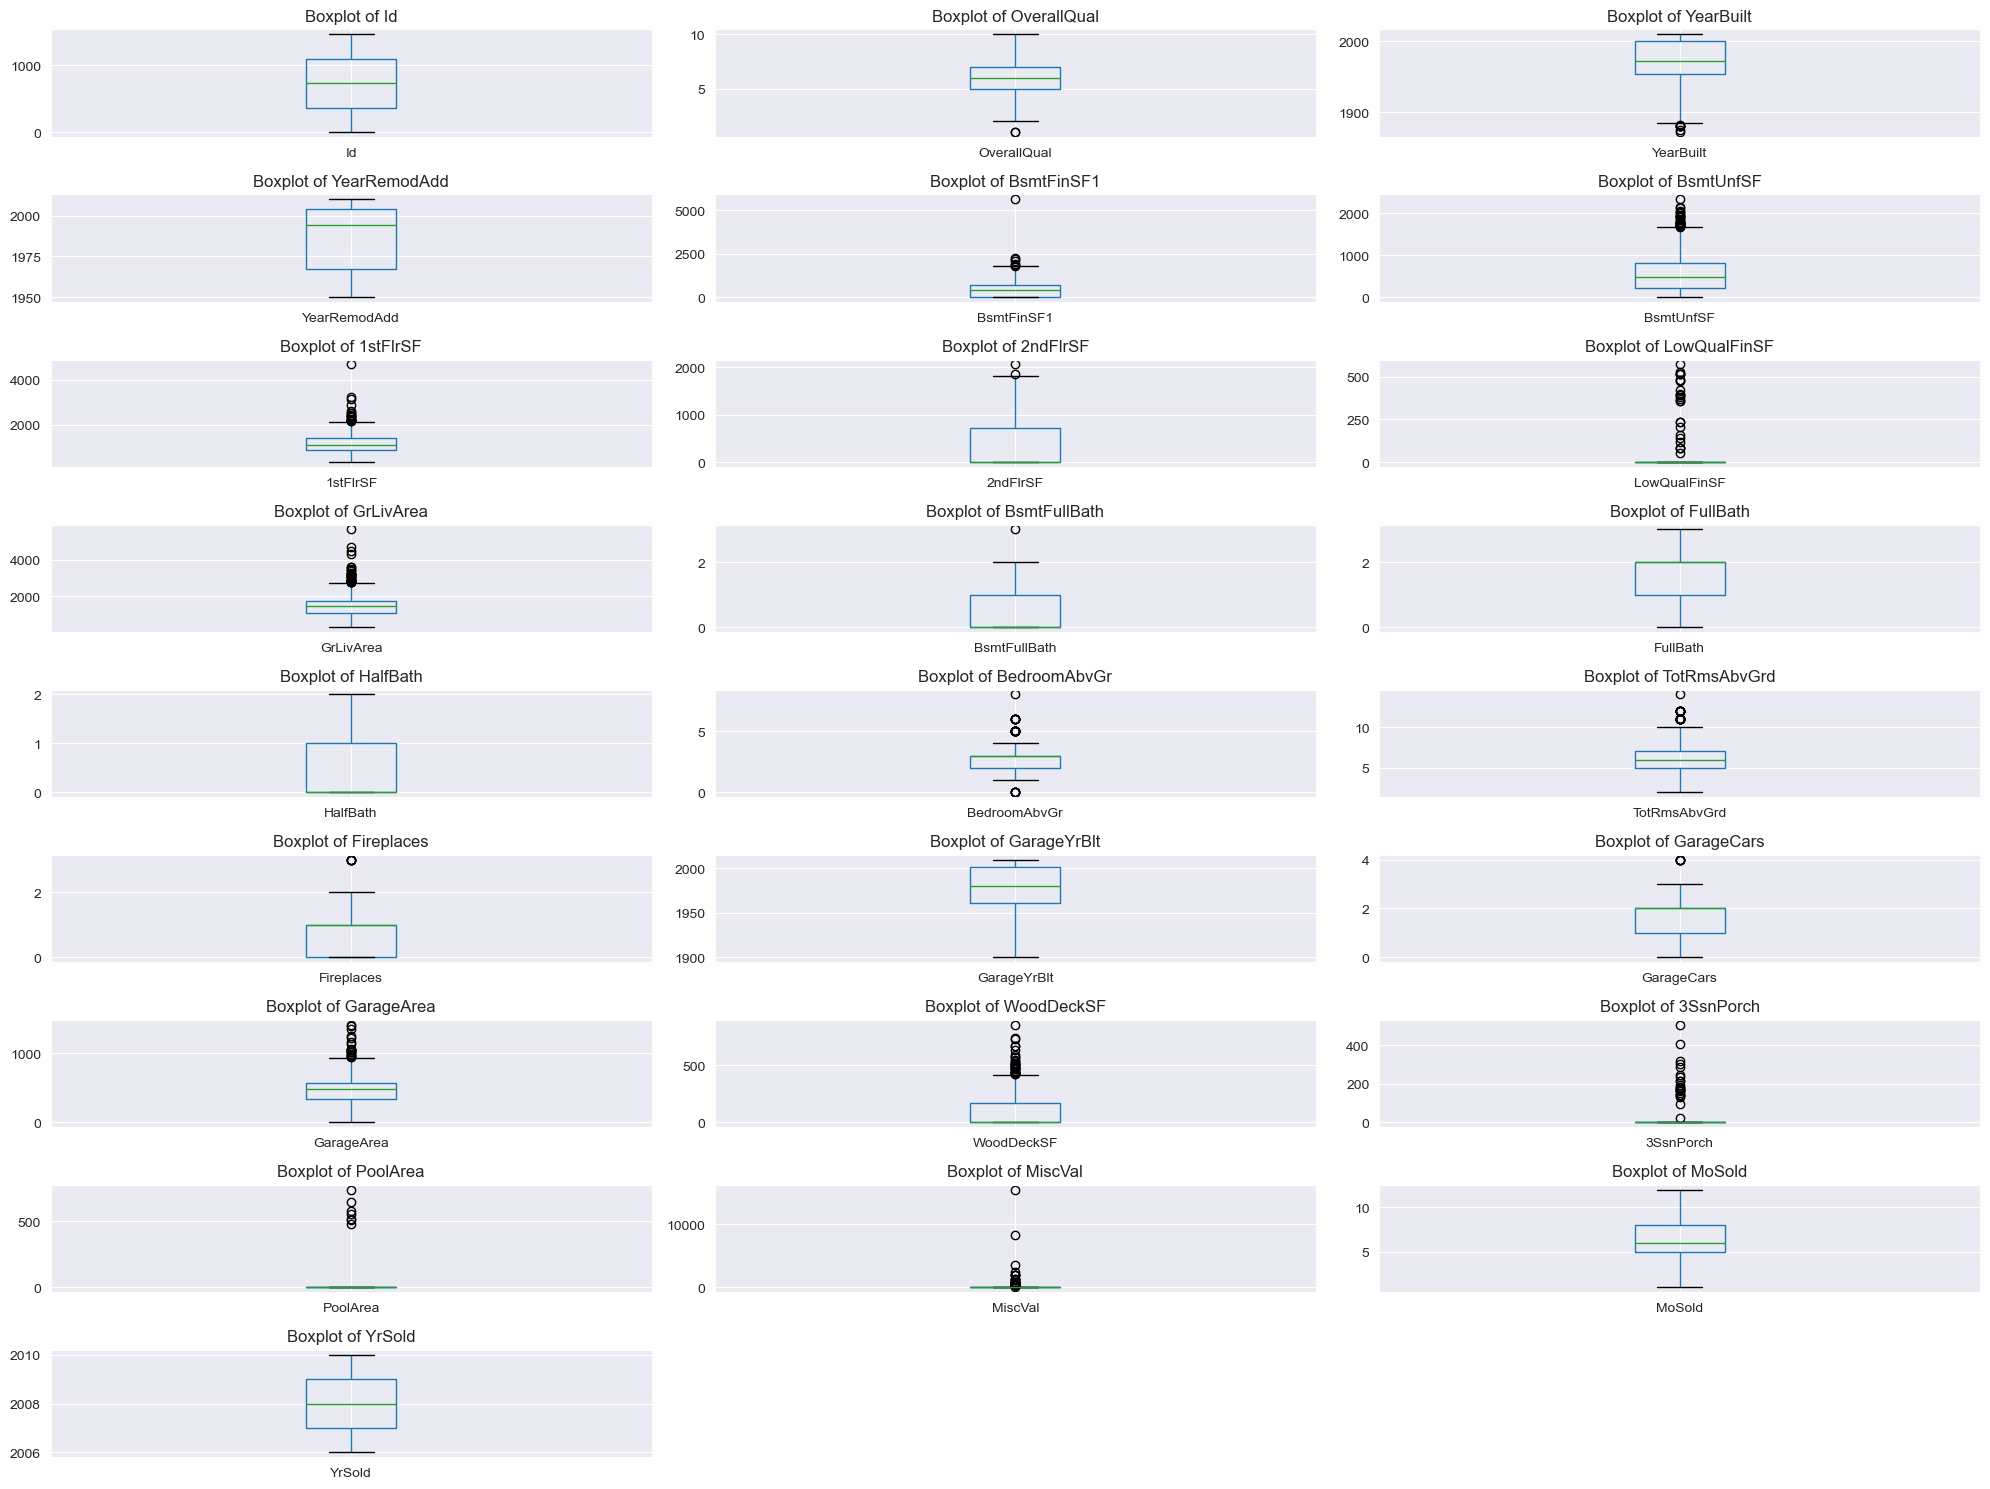

In [77]:
def plot_boxplots_for_low_outlier_features(df, features):
    plt.figure(figsize=(20, 15))
    
    # Create a subplot for each feature
    for i, feature in enumerate(features, 1):
        plt.subplot((len(features) // 3) + 1, 3, i)  # Arrange in rows of 3
        df.boxplot(column=feature)
        plt.title(f"Boxplot of {feature}")
    
    plt.tight_layout()
    plt.show()

# Example usage (after defining `low_outlier_features`):
plot_boxplots_for_low_outlier_features(numeric, low_outlier_features)

According to the box plots, we can see that some of the boxes are barely visible due to the presence of extreme outliers.

1. `MiscVal`
2. `PoolArea`
3. `3SsnPorch`
4. `LowQualFinSF`

Although we found that `SalePrice` has 61 outliers, we will not remove them because the dataset represents house prices, and removing these outliers could harm the model's performance.


In [78]:
def plot_connection_between_2_features(df, feature_1_name, feature_2_name):
    df.plot.scatter(x=feature_1_name, y=feature_2_name, title=f'{feature_1_name} by {feature_2_name}')

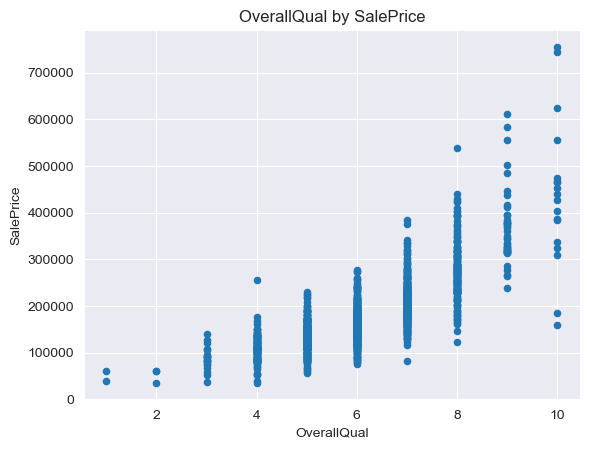

In [79]:
# SalePrice vs OverallQual
plot_connection_between_2_features(house_df, 'OverallQual', 'SalePrice')

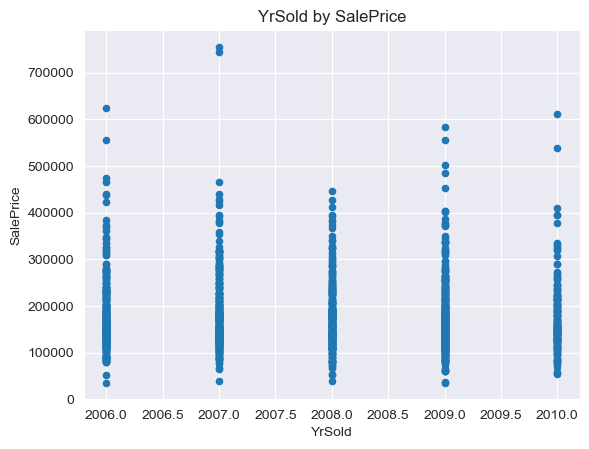

In [80]:
plot_connection_between_2_features(house_df, 'YrSold', 'SalePrice')

---
Handle Missing Values `Nones`

In [81]:
# Select numeric columns
numeric_cols = house_df.select_dtypes(include=['number'])

# Fill missing values in numeric columns with the median
house_df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())

# Check if there are still missing values
print(house_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [82]:
# Define a threshold for dropping columns (e.g., 40% missing values)
threshold = 0.4  # If more than 40% missing, drop the column

# Select categorical columns
categorical_cols = house_df.select_dtypes(include=['object'])

# Calculate missing value count and ratio
missing_counts = categorical_cols.isnull().sum()
missing_ratios = categorical_cols.isnull().mean()

# Identify columns to drop
columns_to_drop = missing_ratios[missing_ratios > threshold].index

# Create a DataFrame to display dropped columns with details
dropped_columns_df = pd.DataFrame({
    "Column Name": columns_to_drop,
    "Nans Amount": missing_counts[columns_to_drop],
    "Percent of Dataset": (missing_ratios[columns_to_drop] * 100).round(2)
}).reset_index(drop=True)

# Print the DataFrame
print("Dropped columns due to high missing values:")
print(dropped_columns_df)

# Drop the columns from the original dataset
house_df.drop(columns=columns_to_drop, axis=1, inplace=True)

Dropped columns due to high missing values:
   Column Name  Nans Amount  Percent of Dataset
0        Alley         1369               93.77
1   MasVnrType          872               59.73
2  FireplaceQu          690               47.26
3       PoolQC         1453               99.52
4        Fence         1179               80.75
5  MiscFeature         1406               96.30


In [83]:
house_df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [84]:
remaining_categorical_cols = house_df.select_dtypes(include=['object']).columns

In [85]:
house_df[remaining_categorical_cols].keys()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [86]:
# Fill missing values in categorical columns with the most frequent value (mode)
house_df[remaining_categorical_cols] = house_df[remaining_categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no missing values left in categorical columns
print("\nRemaining missing values after processing:")
print(house_df[remaining_categorical_cols].isnull().sum())


Remaining missing values after processing:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [87]:
print(house_df.isnull().sum().sum())

0


### Models

---
### Step 1 : Handle Numeric and Categorial Features

In [88]:
y = house_df["SalePrice"]

# Separate numerical and categorical features
numeric_cols = house_df.select_dtypes(include=['number']).columns.drop("SalePrice")  # Exclude target from numeric features
categorical_cols = house_df.select_dtypes(include=['object']).columns

In [89]:
house_df[categorical_cols].keys()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [90]:
# Count unique categories in each categorical column
category_counts = house_df[categorical_cols].nunique().sort_values(ascending=False)

# Convert to a DataFrame for better readability
category_counts_df = pd.DataFrame({
    "Feature": category_counts.index,
    "Unique Categories": category_counts.values
})

In [91]:
category_counts_df

,Feature,Unique Categories
0,Neighborhood,25
1,Exterior2nd,16
2,Exterior1st,15
3,SaleType,9
4,Condition1,9
5,Condition2,8
6,HouseStyle,8
7,RoofMatl,8
8,Functional,7
9,Foundation,6


## Feature Encoding Strategy

| **Feature**             | **Unique Categories** | **Suggested Encoding**       | **Reason** |
|------------------------|---------------------|---------------------------|------------|
| **Neighborhood**       | 25                  | One-Hot Encoding (`pd.get_dummies`) | No natural order, many unique values |
| **Exterior2nd**        | 16                  | One-Hot Encoding           | No meaningful ranking |
| **Exterior1st**        | 15                  | One-Hot Encoding           | No meaningful ranking |
| **SaleType**           | 9                   | One-Hot Encoding           | No meaningful ranking |
| **Condition1**         | 9                   | One-Hot Encoding           | No ranking, categorical |
| **Condition2**         | 8                   | One-Hot Encoding           | No ranking, categorical |
| **HouseStyle**         | 8                   | One-Hot Encoding           | No meaningful order |
| **RoofMatl**           | 8                   | One-Hot Encoding           | No meaningful order |
| **Functional**         | 7                   | **Ordinal Encoding**       | Has an order (e.g., Typical > Minor Issue > Major Issue) |
| **Foundation**         | 6                   | One-Hot Encoding           | No meaningful order |
| **GarageType**         | 6                   | One-Hot Encoding           | No meaningful order |
| **Heating**           | 6                   | One-Hot Encoding           | No meaningful order |
| **BsmtFinType2**      | 6                   | **Ordinal Encoding**       | Ordered categories (e.g., Unfinished < Rec Room < Living Quarters) |
| **BsmtFinType1**      | 6                   | **Ordinal Encoding**       | Ordered categories (e.g., Unfinished < Rec Room < Living Quarters) |
| **SaleCondition**     | 6                   | One-Hot Encoding           | No clear order |
| **RoofStyle**         | 6                   | One-Hot Encoding           | No meaningful order |
| **BldgType**          | 5                   | One-Hot Encoding           | No meaningful order |
| **GarageCond**        | 5                   | **Ordinal Encoding**       | Ordered categories (e.g., Poor < Fair < Good < Excellent) |
| **GarageQual**        | 5                   | **Ordinal Encoding**       | Ordered categories (e.g., Poor < Fair < Good < Excellent) |
| **Electrical**        | 5                   | One-Hot Encoding           | No meaningful order |
| **HeatingQC**         | 5                   | **Ordinal Encoding**       | Ordered categories (e.g., Poor < Fair < Good < Excellent) |
| **LotConfig**         | 5                   | One-Hot Encoding           | No meaningful order |
| **MSZoning**          | 5                   | One-Hot Encoding           | No meaningful order |
| **ExterCond**         | 5                   | **Ordinal Encoding**       | Ordered categories (e.g., Poor < Fair < Good < Excellent) |
| **BsmtExposure**      | 4                   | **Ordinal Encoding**       | Ordered categories (e.g., No Exposure < Min Exposure < Average < Good) |


In [92]:
ordinal_mappings = {
    "Functional": ["Salv", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "GarageCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"]
}

# Convert ordinal categories to numerical codes
for col, categories in ordinal_mappings.items():
    house_df[col] = house_df[col].astype(pd.CategoricalDtype(categories=categories, ordered=True))
    house_df[col] = house_df[col].cat.codes

# Step 4: Perform One-Hot Encoding on nominal categorical features
nominal_columns = [
    "Neighborhood", "Exterior2nd", "Exterior1st", "SaleType", "Condition1", "Condition2",
    "HouseStyle", "RoofMatl", "Foundation", "GarageType", "Heating", "SaleCondition",
    "RoofStyle", "BldgType", "Electrical", "LotConfig", "MSZoning"
]

ordinal_scaled = pd.DataFrame(StandardScaler().fit_transform(house_df[ordinal_mappings.keys()]), 
                              columns=house_df[ordinal_mappings.keys()].columns)

X_categorical_df = pd.get_dummies(house_df[nominal_columns], drop_first=True)

---
## Step 2: Apply PCA on numerical features

Before reducing dimensions, we should find out how many principal components we need to retain `95%` variance.


In [93]:
# Step 1: Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(house_df[numeric_cols])

# Step 2: Apply PCA to numerical features only
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f"PCA_{i+1}" for i in range(X_pca.shape[1])])

### Combine The PCA features and Categorical data 

In [94]:
# Step 5: Merge PCA-transformed numeric features, ordinal-encoded features, and one-hot encoded categorical features
X_final = pd.concat([X_pca_df, house_df[ordinal_mappings.keys()], X_categorical_df], axis=1)

In [95]:
X_final.head(10)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,Electrical_Mix,Electrical_SBrkr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1.469901,0.345550,1.703767,-1.925344,0.439841,1.333914,-0.520612,-0.518876,-0.395462,-0.545862,...,False,True,False,False,False,True,False,False,True,False
1,-0.028894,-1.088781,-1.254683,-0.028189,-1.829165,-0.047360,3.773691,-0.237018,-0.087574,0.019417,...,False,True,False,True,False,False,False,False,True,False
2,1.656562,0.222751,1.480556,-1.363849,-0.215014,-0.198187,-0.135267,-0.444583,-0.456664,-0.524461,...,False,True,False,False,False,True,False,False,True,False
3,-0.364303,1.006993,-0.776783,-0.173136,0.398339,0.444890,-1.449423,0.298453,-1.252034,-2.165370,...,False,True,False,False,False,False,False,False,True,False
4,4.415599,1.086393,0.519742,-1.383111,-0.192935,-0.550012,0.498944,-0.647252,-1.002425,-0.208011,...,False,True,False,True,False,False,False,False,True,False
5,-0.687817,-1.970622,1.122182,-1.298210,-1.057353,1.041308,3.162933,-1.843437,-2.750777,-4.048651,...,False,True,False,False,False,True,False,False,True,False
6,3.168739,-2.541440,-0.413837,-0.229450,0.566000,-0.314319,0.955358,0.449311,-0.225870,-0.694495,...,False,True,False,False,False,True,False,False,True,False
7,1.999961,1.226120,-1.389765,-2.205966,-0.721568,-0.107114,-0.290839,0.312681,-0.386432,-1.940273,...,False,True,False,False,False,False,False,False,True,False
8,-0.880670,2.793080,-1.618506,1.286722,2.493418,0.113482,0.095218,-1.165519,0.778521,-1.849422,...,False,False,False,False,False,True,False,False,False,True
9,-3.184784,-0.148606,-1.351031,-1.947442,3.832349,-0.352271,0.704742,-1.263143,2.279080,-1.979279,...,False,True,False,False,False,False,False,False,True,False


### Hyper Parameter for PCA
Choose the number of components where `variance > 95%`

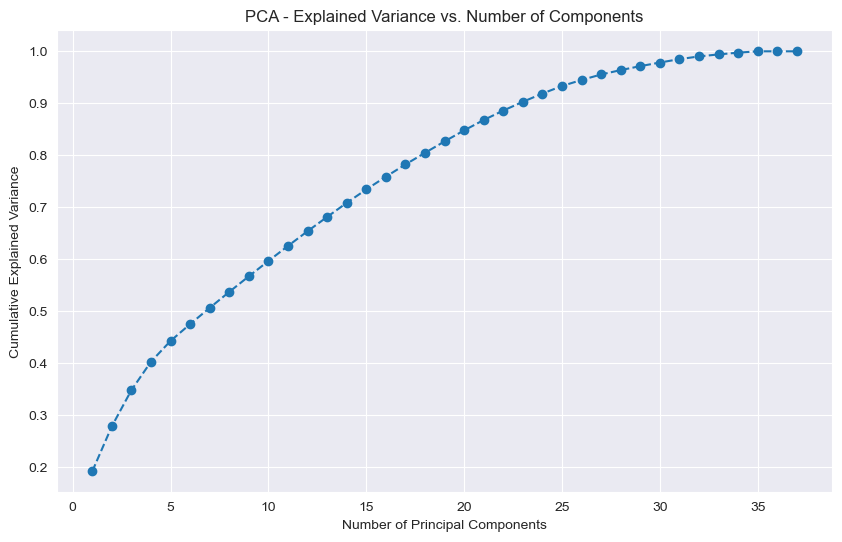

Optimal number of PCA components: 27


In [96]:
# Step 5: Plot Explained Variance to Find Best PCA Components
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

# Choose optimal number of components that explain ~95% variance
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")

In [97]:
# Apply PCA with the best number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca_optimal, columns=[f"PCA_{i+1}" for i in range(optimal_components)])

In [98]:
X_final = pd.concat([X_pca_df, house_df[ordinal_mappings.keys()], X_categorical_df], axis=1)
#X_final = pd.concat([X_pca_df, ordinal_scaled, X_categorical_df], axis=1)

In [99]:
X_final.head(10)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,Electrical_Mix,Electrical_SBrkr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1.469901,0.345550,1.703767,-1.925344,0.439841,1.333914,-0.520612,-0.518876,-0.395462,-0.545862,...,False,True,False,False,False,True,False,False,True,False
1,-0.028894,-1.088781,-1.254683,-0.028189,-1.829165,-0.047360,3.773691,-0.237018,-0.087574,0.019417,...,False,True,False,True,False,False,False,False,True,False
2,1.656562,0.222751,1.480556,-1.363849,-0.215014,-0.198187,-0.135267,-0.444583,-0.456664,-0.524461,...,False,True,False,False,False,True,False,False,True,False
3,-0.364303,1.006993,-0.776783,-0.173136,0.398339,0.444890,-1.449423,0.298453,-1.252034,-2.165370,...,False,True,False,False,False,False,False,False,True,False
4,4.415599,1.086393,0.519742,-1.383111,-0.192935,-0.550012,0.498944,-0.647252,-1.002425,-0.208011,...,False,True,False,True,False,False,False,False,True,False
5,-0.687817,-1.970622,1.122182,-1.298210,-1.057353,1.041308,3.162933,-1.843437,-2.750777,-4.048651,...,False,True,False,False,False,True,False,False,True,False
6,3.168739,-2.541440,-0.413837,-0.229450,0.566000,-0.314319,0.955358,0.449311,-0.225870,-0.694495,...,False,True,False,False,False,True,False,False,True,False
7,1.999961,1.226120,-1.389765,-2.205966,-0.721568,-0.107114,-0.290839,0.312681,-0.386432,-1.940273,...,False,True,False,False,False,False,False,False,True,False
8,-0.880670,2.793080,-1.618506,1.286722,2.493418,0.113482,0.095218,-1.165519,0.778521,-1.849422,...,False,False,False,False,False,True,False,False,False,True
9,-3.184784,-0.148606,-1.351031,-1.947442,3.832349,-0.352271,0.704742,-1.263143,2.279080,-1.979279,...,False,True,False,False,False,False,False,False,True,False


---
### Model N.O 1 - Gradient Boosting Regressor Tuning

A **Gradient Boosting Regressor** is initialized, and hyperparameters are optimized using **RandomizedSearchCV**.  
The best parameters are selected based on **cross-validation**, and the model's performance is evaluated using **Root Mean Squared Error (RMSE)** to measure prediction accuracy.

In [100]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size
    'max_depth': [3, 4, 5],  # Maximum depth of the individual estimators
    'subsample': [0.8, 1.0],  # Fraction of samples to use for fitting the individual base learners
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# fitting the RandomizedSearchCV
random_search_gbr = RandomizedSearchCV(estimator=gbr_model,
                                       param_distributions=param_dist,
                                       n_iter=30,
                                       scoring=mae_scorer,
                                       cv=5,
                                       verbose=1,
                                       random_state=42,
                                       n_jobs=-1,
                                       return_train_score=True )

random_search_gbr.fit(X_train, y_train)

# best parameters and best score
best_params_gbr = random_search_gbr.best_params_
best_score_gbr = -random_search_gbr.best_score_  # Convert back to positive MAE

# Print the results
print("\nBest Parameters from RandomizedSearchCV for GradientBoostingRegressor:")
print(best_params_gbr)
print(f"Best Mean Absolute Error: {best_score_gbr}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters from RandomizedSearchCV for GradientBoostingRegressor:
{'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}
Best Mean Absolute Error: 15929.165997365864


# Gradient Boosting Regressor Results

## Best Hyperparameters  
The optimal hyperparameters found using **RandomizedSearchCV**:  
- **Subsample:** `0.8`  
- **Number of Estimators:** `200`  
- **Min Samples Split:** `2`  
- **Min Samples Leaf:** `1`  
- **Max Depth:** `3`  
- **Learning Rate:** `0.1`  

## Model Performance  
- **Best Mean Absolute Error (MAE):** **`15,929.16`**  

In [102]:
# Make predictions on the test set
y_pred = random_search_gbr.best_estimator_.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE result
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.4f}")

Root Mean Squared Error (RMSE) on Test Set: 27790.4478


# Model Evaluation on Test Set

## Predictions  
The best-tuned **Gradient Boosting Regressor** was used to predict values on the test set.

## Performance Metric  
The model's performance was evaluated using **Root Mean Squared Error (RMSE):**  

- **RMSE on Test Set:** **`27,790.44`**  

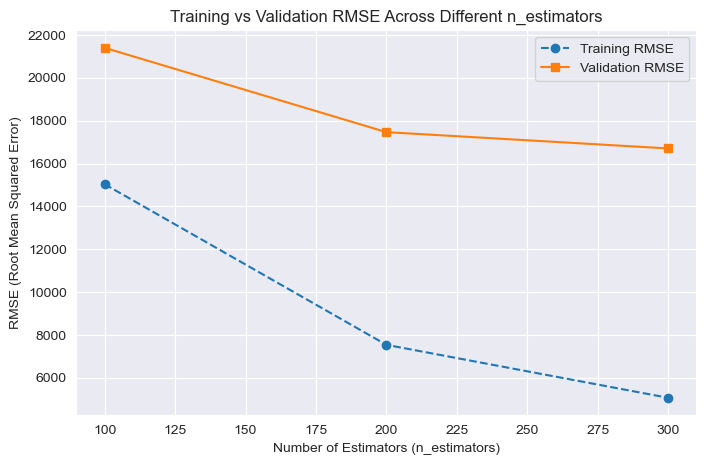

In [103]:
# Convert RandomizedSearchCV results to DataFrame
cv_results_gbr = pd.DataFrame(random_search_gbr.cv_results_)

# Extract unique n_estimators values
n_estimators_values = sorted(cv_results_gbr["param_n_estimators"].unique())

# Initialize lists to store RMSE values
train_rmse = []
val_rmse = []

# Loop through each n_estimators value and calculate mean RMSE
for n in n_estimators_values:
    # Filter results for the specific n_estimators value
    n_results = cv_results_gbr[cv_results_gbr["param_n_estimators"] == n]
    
    # Compute mean RMSE for training and validation (negate because GridSearchCV minimizes negative MAE)
    train_rmse.append(-n_results["mean_train_score"].mean())
    val_rmse.append(-n_results["mean_test_score"].mean())

# Plot Training and Validation RMSE vs n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_values, train_rmse, marker='o', linestyle='--', label="Training RMSE")
plt.plot(n_estimators_values, val_rmse, marker='s', linestyle='-', label="Validation RMSE")

plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("RMSE (Root Mean Squared Error)")
plt.title("Training vs Validation RMSE Across Different n_estimators")
plt.legend()
plt.grid(True)
plt.show()

---
# Decision Tree with Random Forest Regressor  

## Data Preparation  
The dataset is preprocessed using PCA and categorical encoding.  

## Model & Hyperparameter Tuning  
A **Random Forest Regressor** is trained with **GridSearchCV** to find the best parameters.  
The hyperparameter search includes **tree count, max depth, and bootstrap options**.  

## Performance Evaluation  
The best model is selected based on **Root Mean Squared Error (RMSE)** from cross-validation.  

### Best Results:  
- **Optimal Hyperparameters:** Tuned using **GridSearchCV**  
- **Best RMSE (Cross-Validation):** *Displayed in results*


In [104]:
# scaler = StandardScaler()
# ordinal_scaled = pd.DataFrame(scaler.fit_transform(house_df[ordinal_mappings.keys()]), columns=house_df[ordinal_mappings.keys()].columns)
# X_final = pd.concat([X_pca_df, ordinal_scaled, X_categorical_df], axis=1)

X_final = pd.concat([X_pca_df, house_df[ordinal_mappings.keys()], X_categorical_df], axis=1)

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Step 2: Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Step 3: Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # More variations in tree count
    'max_depth': [10, 20, 30, 40],  # Increase max depth options
    'bootstrap': [True, False]  # Try with and without bootstrap
}

# Step 4: Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,  # Use param_grid instead of param_distributions
    scoring='neg_root_mean_squared_error',  # Optimize for MAE
    cv=5,  # 5-Fold Cross Validation
    verbose=1,
    n_jobs=-1,  # Use all available processors
    return_train_score=True  # Store training scores for visualization
)

# Step 5: Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Step 6: Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_rmse_rf = -grid_search_rf.best_score_  # Convert back to positive RMSE

print("\n Best Parameters from GridSearchCV for Random Forest:")
print(best_params_rf)
print(f" Best RMSE (Cross-Validation): {best_rmse_rf:.2f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

 Best Parameters from GridSearchCV for Random Forest:
{'bootstrap': True, 'max_depth': 20, 'n_estimators': 200}
 Best RMSE (Cross-Validation): 30787.68


# Random Forest Regressor Results  

## Hyperparameter Tuning  
**GridSearchCV** tested **`32` hyperparameter combinations** using **`5-fold` cross-validation**, resulting in **`160` fits**.  

## Best Hyperparameters  
- **Bootstrap:** `True`  
- **Max Depth:** `20`  
- **Number of Estimators:** `200`  


In [105]:
# Step 7: Train Random Forest with Best Hyperparameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Step 8: Make predictions on test set
y_pred = best_rf_model.predict(X_test)

# Step 9: Evaluate the final model on test data
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n Final Model Evaluation on Test Set:")
print(f" Random Forest MAE: {mae:.2f}")
print(f" Random Forest RMSE: {rmse:.2f}")



 Final Model Evaluation on Test Set:
 Random Forest MAE: 18039.87
 Random Forest RMSE: 30452.14


# Final Model Evaluation: Random Forest Regressor  

## Training & Predictions  
The **Random Forest Regressor** was trained using the best hyperparameters from **GridSearchCV** and tested on the unseen dataset.  

## Performance Metrics  
- **Mean Absolute Error (MAE):** **`18,039.87`**  
- **Root Mean Squared Error (RMSE):** **`30,452.14`**  

---

# PCA vs. No PCA: Random Forest Performance Comparison  

## Dataset Preparation  
- **With PCA:** Principal Component Analysis (PCA) was applied to numerical features, reducing dimensionality while retaining essential variance.  
- **Without PCA:** The original numerical features were **standardized** without dimensionality reduction.  

## Model Training  
A **Random Forest Regressor** was trained on both datasets using the best hyperparameters obtained from **GridSearchCV**.  

## Performance Evaluation  
The models were evaluated based on **Root Mean Squared Error (RMSE)**:  

| Model          | RMSE  |
|---------------|--------|
| **With PCA**  | **`30,452.14`** |
| **Without PCA** | **`29,048.09`** |

## Insights  
- The model **without PCA** performed **better**, achieving a lower RMSE.  
- PCA may have **lost some valuable information**, leading to a slight increase in prediction error.  


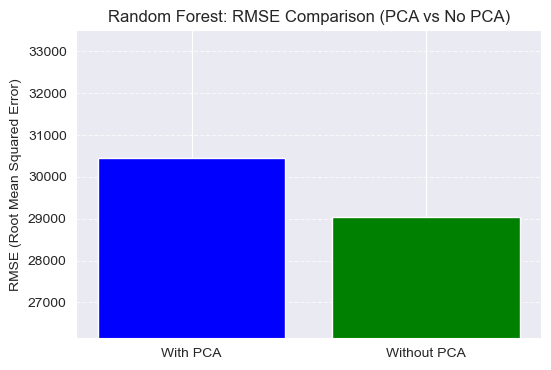

RMSE with PCA: 30452.14
RMSE without PCA: 29048.09


In [106]:
# Prepare dataset with PCA
X_final_pca = pd.concat([X_pca_df, house_df[ordinal_mappings.keys()], X_categorical_df], axis=1)

# Prepare dataset without PCA (original numerical features)
X_numeric_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)
X_final_no_pca = pd.concat([X_numeric_scaled, house_df[ordinal_mappings.keys()], X_categorical_df], axis=1)

# Train-Test Split for both cases
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_final_pca, y, test_size=0.2, random_state=42)
X_train_no_pca, X_test_no_pca, y_train_no_pca, y_test_no_pca = train_test_split(X_final_no_pca, y, test_size=0.2, random_state=42)

# Train Random Forest with PCA features
rf_pca = RandomForestRegressor(**best_params_rf, random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))

# Train Random Forest without PCA
rf_no_pca = RandomForestRegressor(**best_params_rf, random_state=42)
rf_no_pca.fit(X_train_no_pca, y_train_no_pca)
y_pred_no_pca = rf_no_pca.predict(X_test_no_pca)
rmse_no_pca = np.sqrt(mean_squared_error(y_test_no_pca, y_pred_no_pca))

# Plot RMSE comparison
plt.figure(figsize=(6, 4))
plt.bar(["With PCA", "Without PCA"], [rmse_pca, rmse_no_pca], color=['blue', 'green'])
plt.ylabel("RMSE (Root Mean Squared Error)")
plt.title("Random Forest: RMSE Comparison (PCA vs No PCA)")
plt.ylim(min(rmse_pca, rmse_no_pca) * 0.9, max(rmse_pca, rmse_no_pca) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print RMSE values
print(f"RMSE with PCA: {rmse_pca:.2f}")
print(f"RMSE without PCA: {rmse_no_pca:.2f}")

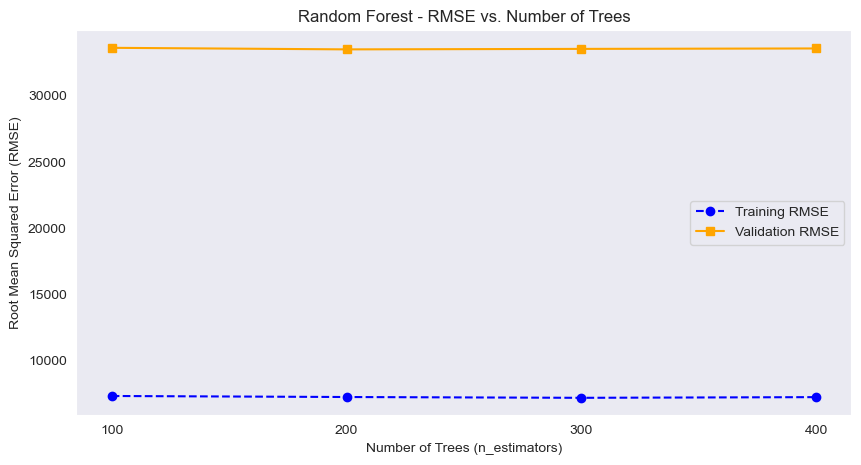

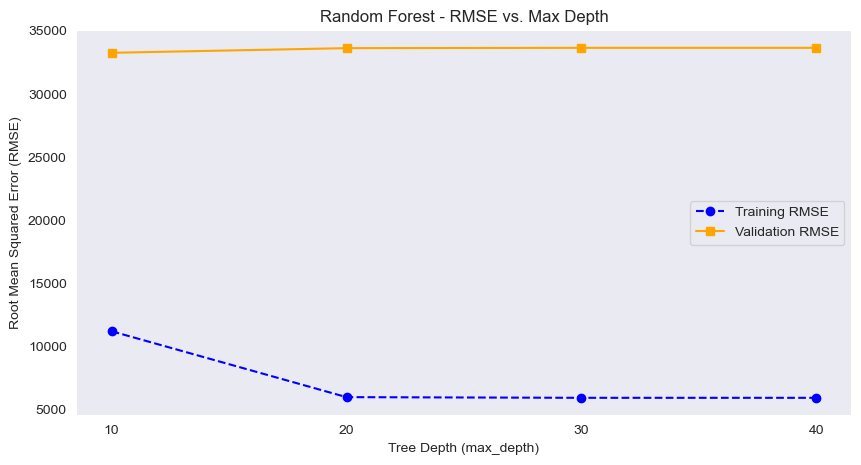

In [107]:
# Extract GridSearchCV results
cv_results = grid_search_rf.cv_results_

# Extract unique values of hyperparameters
n_estimators_values = param_grid['n_estimators']
max_depth_values = param_grid['max_depth']

# Extract RMSE for training and validation for each hyperparameter
rmse_train_n_estimators = []
rmse_val_n_estimators = []
rmse_train_max_depth = []
rmse_val_max_depth = []

# Process results for n_estimators
for n in n_estimators_values:
    indices = np.where(np.array(cv_results['param_n_estimators'].data) == n)[0]
    rmse_train_n_estimators.append(-np.mean(cv_results["mean_train_score"][indices]))  # Training RMSE
    rmse_val_n_estimators.append(-np.mean(cv_results["mean_test_score"][indices]))  # Validation RMSE

# Process results for max_depth
for d in max_depth_values:
    indices = np.where(np.array(cv_results['param_max_depth'].data) == d)[0]
    rmse_train_max_depth.append(-np.mean(cv_results["mean_train_score"][indices]))  # Training RMSE
    rmse_val_max_depth.append(-np.mean(cv_results["mean_test_score"][indices]))  # Validation RMSE

# Plot RMSE vs n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, rmse_train_n_estimators, marker="o", linestyle="--", color='blue', label="Training RMSE")
plt.plot(n_estimators_values, rmse_val_n_estimators, marker="s", linestyle="-", color='orange', label="Validation RMSE")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Random Forest - RMSE vs. Number of Trees")
plt.xticks(n_estimators_values)
plt.legend()
plt.grid()
plt.show()

# Plot RMSE vs max_depth
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, rmse_train_max_depth, marker="o", linestyle="--", color='blue', label="Training RMSE")
plt.plot(max_depth_values, rmse_val_max_depth, marker="s", linestyle="-", color='orange', label="Validation RMSE")

plt.xlabel("Tree Depth (max_depth)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Random Forest - RMSE vs. Max Depth")
plt.xticks(max_depth_values)
plt.legend()
plt.grid()
plt.show()

---
# Hyperparameter Tuning for KNN with GridSearchCV and Bagging  

## Dataset Preparation with PCA  
- **PCA** is applied to numerical features to reduce dimensionality while preserving variance.  

## GridSearchCV for KNN  
**GridSearchCV** is used to optimize **KNN** hyperparameters:  

### Parameters Tuned:  
- **n_neighbors** → `[3, 5, 7, 10]`  
  - Number of nearest neighbors used for prediction.  
- **weights** → `['uniform', 'distance']`  
  - `uniform`: All neighbors contribute equally.  
  - `distance`: Closer neighbors have higher influence.  
- **p** → `[1, 2]`  
  - `1`: Manhattan distance (L1 norm).  
  - `2`: Euclidean distance (L2 norm).  

Best hyperparameters are selected based on **Root Mean Squared Error (RMSE)**.  

## Bagging with KNN  
After finding the best **KNN model**, it is wrapped in a **BaggingRegressor** to enhance performance:  
- **PCA-transformed features** are used.  
- **50 bootstrapped KNN models** are trained.  
- **Sampling with replacement** is enabled (Bootstrap = True).   

The final model is evaluated using **RMSE** and **MAE** to measure prediction accuracy.


In [108]:
X_final = pd.concat([X_pca_df, house_df[ordinal_mappings.keys()], X_categorical_df], axis=1)

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Step 2: Initialize Base KNN Regressor
knn_base = KNeighborsRegressor()

# Step 3: Define the Hyperparameter Grid for KNN (NO Bagging Yet)
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Optimize KNN neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean distance
}

# Step 4: Perform Grid Search on KNN first (NO Bagging)
grid_search_knn = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=5,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

grid_search_knn.fit(X_train, y_train)

# Step 5: Get Best KNN Parameters and RMSE
best_params_knn = grid_search_knn.best_params_
best_rmse_knn = -grid_search_knn.best_score_  # Convert back to positive RMSE

print("\n Best Parameters for KNN:")
print(best_params_knn)
print(f" Best RMSE (Cross-Validation for KNN): {best_rmse_knn:.2f}")

# Step 6: Use Best KNN Model inside Bagging Regressor
best_knn = KNeighborsRegressor(
    n_neighbors=best_params_knn['n_neighbors'],
    weights=best_params_knn['weights'],
    p=best_params_knn['p']
)

bagging_knn = BaggingRegressor(
    estimator=best_knn,  # ✅ Use the best KNN model
    n_estimators=50,  # Number of bootstrapped models
    bootstrap=True,  # Enable bootstrap sampling
    n_jobs=-1,
    random_state=42
)

# Step 7: Train the Bagging KNN model
bagging_knn.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = bagging_knn.predict(X_test)

# Step 9: Evaluate Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"\n Final Model Evaluation on Test Set:")
print(f" Bagging KNN RMSE: {rmse:.2f}")
print(f" Bagging KNN MAE: {mae:.2f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best Parameters for KNN:
{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
 Best RMSE (Cross-Validation for KNN): 37418.05

 Final Model Evaluation on Test Set:
 Bagging KNN RMSE: 39592.16
 Bagging KNN MAE: 21949.07


# KNN with Bagging: Results  

## Hyperparameter Tuning (GridSearchCV)  
- **Total Configurations Tested:** `16`  
- **Total Fits (5-Fold CV):** `80`  

### Best KNN Parameters:  
- **n_neighbors:** `10`  
- **p (Distance Metric):** `2 (Euclidean)`  
- **weights:** `Distance-based`  

### Performance (Cross-Validation):  
- **Best RMSE (KNN):** **`37,418.05`**  

## Final Model Evaluation (Bagging KNN)  
- **Test RMSE:** **`39,592.16`**  
- **Test MAE:** **`21,949.07`**  

### Insights  
- Bagging increased model stability but resulted in a slightly **higher RMSE**.  
- The **distance-weighted KNN with Euclidean distance** was the best configuration.  


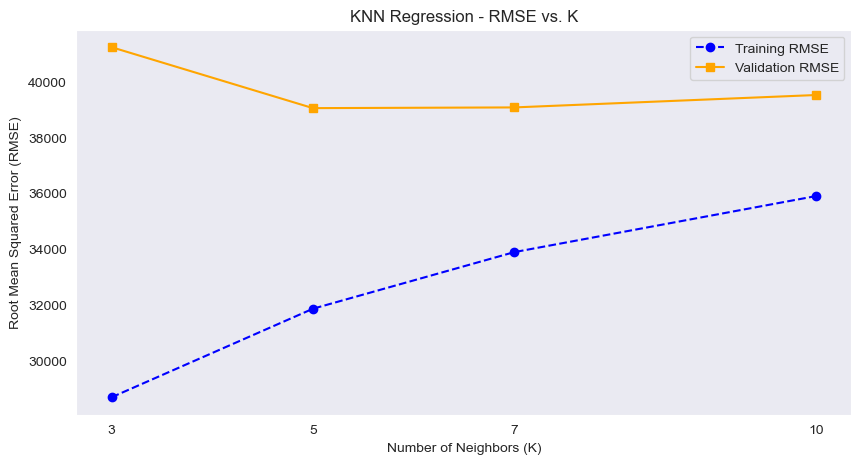

In [109]:
# Extract results from GridSearchCV
cv_results = grid_search_knn.cv_results_

# Get unique values of K (n_neighbors)
k_values = param_grid['n_neighbors']

# Extract RMSE for each K value
rmse_train = []
rmse_val = []

for k in k_values:
    index = np.where(cv_results['param_n_neighbors'].data == k)[0][0]  # Get index for K value
    rmse_train.append(-cv_results["mean_train_score"][index])  # Convert negative RMSE to positive
    rmse_val.append(-cv_results["mean_test_score"][index])  # Convert negative RMSE to positive

# Plot RMSE vs K for both Training and Validation
plt.figure(figsize=(10, 5))
plt.plot(k_values, rmse_train, marker="o", linestyle="--", color='blue', label="Training RMSE")
plt.plot(k_values, rmse_val, marker="s", linestyle="-", color='orange', label="Validation RMSE")

plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("KNN Regression - RMSE vs. K")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

# KNN with Bagging: PCA vs. No PCA  

## Dataset Preparation  
- **With PCA:** Principal Component Analysis (PCA) applied to numerical features.  
- **Without PCA:** Original numerical features scaled without dimensionality reduction.  

## Hyperparameter Tuning (GridSearchCV)  
- **20 configurations tested** for each model using **5-fold cross-validation** (100 fits total per model).  
- Optimized parameters:  
  - **n_neighbors (k):** `[2, 3, 5, 7, 10]`  
  - **weights:** `['uniform', 'distance']`  
  - **distance metric (p):** `[1: Manhattan, 2: Euclidean]`  

## Bagging Implementation  
- **100 bootstrapped models** trained for each KNN model.  
- **Bootstrap sampling enabled** for variance reduction.  

## Final Model Evaluation  

| Model | RMSE | MAE |
|--------|------------|------------|
| **Bagging KNN with PCA** | **48,602.15** | **27,730.34** |
| **Bagging KNN without PCA** | **36,572.26** | **20,415.23** |

## PCA + Bootstrap Impact Analysis  
- **RMSE Difference:** **+12,029.90** (PCA performed worse)  
- **MAE Difference:** **+7,315.10**  

### Conclusion  
**PCA + Bagging decreased performance!**  
- Removing PCA led to **lower RMSE and MAE**, meaning the model performed better without dimensionality reduction.  


In [110]:
X_final_pca = pd.concat([X_pca_df], axis=1)

# Step 6: Combine without PCA (Original Scaled Data)
X_final_no_pca = pd.concat([house_df[numeric_cols]], axis=1)

# Step 7: Re-scale final datasets for KNN
scaler_final = StandardScaler()
X_final_pca_scaled = scaler_final.fit_transform(X_final_pca)
X_final_no_pca_scaled = scaler_final.fit_transform(X_final_no_pca)

# Step 8: Split data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_final_pca_scaled, y, test_size=0.2, random_state=42)
X_train_no_pca, X_test_no_pca, _, _ = train_test_split(X_final_no_pca_scaled, y, test_size=0.2, random_state=42)

# Step 9: Initialize Base KNN Regressor
knn_base = KNeighborsRegressor()

# Step 10: Define the Hyperparameter Grid for KNN
param_grid = {
    'n_neighbors': [2, 3, 5, 7 , 10],  # Reduce the range of K values
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean distance
}

# Step 11: Perform Grid Search on KNN with PCA
grid_search_knn_pca = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=5,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

grid_search_knn_pca.fit(X_train_pca, y_train)

# Step 12: Perform Grid Search on KNN without PCA
grid_search_knn_no_pca = GridSearchCV(
    estimator=knn_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

grid_search_knn_no_pca.fit(X_train_no_pca, y_train)

# Step 13: Get Best Parameters for KNN
best_params_knn_pca = grid_search_knn_pca.best_params_
best_params_knn_no_pca = grid_search_knn_no_pca.best_params_

# Step 14: Use Best KNN Models inside Bagging Regressor (Bootstrap)
best_knn_pca = KNeighborsRegressor(**best_params_knn_pca)
best_knn_no_pca = KNeighborsRegressor(**best_params_knn_no_pca)

bagging_knn_pca = BaggingRegressor(
    estimator=best_knn_pca,
    n_estimators=100,  # Increase the number of bootstrapped models
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

bagging_knn_no_pca = BaggingRegressor(
    estimator=best_knn_no_pca,
    n_estimators=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# Step 15: Train Bagging Models
bagging_knn_pca.fit(X_train_pca, y_train)
bagging_knn_no_pca.fit(X_train_no_pca, y_train)

# Step 16: Make Predictions
y_pred_pca = bagging_knn_pca.predict(X_test_pca)
y_pred_no_pca = bagging_knn_no_pca.predict(X_test_no_pca)

# Step 17: Evaluate Performance
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
mae_pca = mean_absolute_error(y_test, y_pred_pca)

rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred_no_pca))
mae_no_pca = mean_absolute_error(y_test, y_pred_no_pca)

print("\nFinal Model Evaluation on Test Set (With Bagging):")
print(f"Bagging KNN with PCA RMSE: {rmse_pca:.2f}")
print(f"Bagging KNN with PCA MAE: {mae_pca:.2f}")
print(f"Bagging KNN without PCA RMSE: {rmse_no_pca:.2f}")
print(f"Bagging KNN without PCA MAE: {mae_no_pca:.2f}")

# Step 18: Print How PCA & Bootstrap Affect the Model
print("\nPCA + Bootstrap Impact Analysis:")
print(f"RMSE Difference: {rmse_pca - rmse_no_pca:.2f}")
print(f"MAE Difference: {mae_pca - mae_no_pca:.2f}")

if rmse_pca < rmse_no_pca:
    print("PCA + Bootstrap Improved Performance!")
else:
    print("PCA + Bootstrap Decreased Performance!")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Final Model Evaluation on Test Set (With Bagging):
Bagging KNN with PCA RMSE: 48602.15
Bagging KNN with PCA MAE: 27730.34
Bagging KNN without PCA RMSE: 36572.26
Bagging KNN without PCA MAE: 20415.23

PCA + Bootstrap Impact Analysis:
RMSE Difference: 12029.90
MAE Difference: 7315.10
PCA + Bootstrap Decreased Performance!


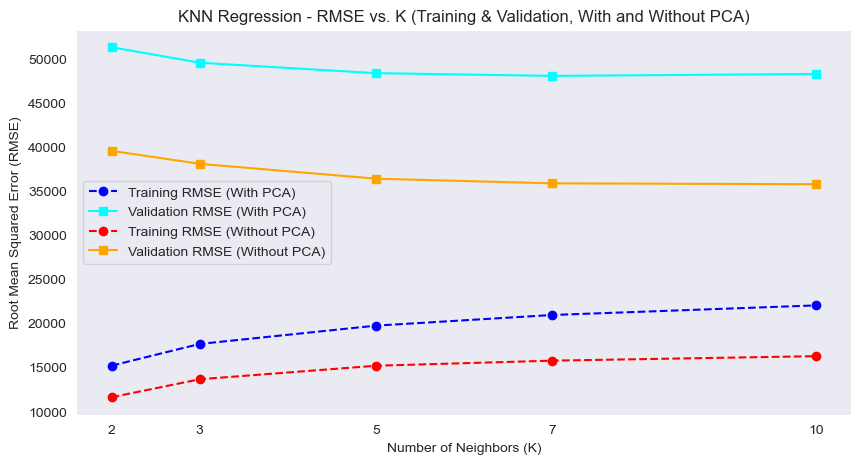

In [111]:
# Extract unique K values
k_values = param_grid['n_neighbors']

# Extract RMSE values corresponding to each K value (Training & Validation)
rmse_train_pca = []
rmse_val_pca = []
rmse_train_no_pca = []
rmse_val_no_pca = []

for k in k_values:
    # Extract training and validation RMSE for KNN with PCA
    indices_pca = np.where(grid_search_knn_pca.cv_results_['param_n_neighbors'].data == k)[0]
    rmse_train_pca.append(-grid_search_knn_pca.cv_results_["mean_train_score"][indices_pca].mean())  # Training RMSE
    rmse_val_pca.append(-grid_search_knn_pca.cv_results_["mean_test_score"][indices_pca].mean())  # Validation RMSE

    # Extract training and validation RMSE for KNN without PCA
    indices_no_pca = np.where(grid_search_knn_no_pca.cv_results_['param_n_neighbors'].data == k)[0]
    rmse_train_no_pca.append(-grid_search_knn_no_pca.cv_results_["mean_train_score"][indices_no_pca].mean())  # Training RMSE
    rmse_val_no_pca.append(-grid_search_knn_no_pca.cv_results_["mean_test_score"][indices_no_pca].mean())  # Validation RMSE

# Plot RMSE vs K (Training & Validation)
plt.figure(figsize=(10, 5))

# KNN with PCA
plt.plot(k_values, rmse_train_pca, marker="o", linestyle="--", color='blue', label="Training RMSE (With PCA)")
plt.plot(k_values, rmse_val_pca, marker="s", linestyle="-", color='cyan', label="Validation RMSE (With PCA)")

# KNN without PCA
plt.plot(k_values, rmse_train_no_pca, marker="o", linestyle="--", color='red', label="Training RMSE (Without PCA)")
plt.plot(k_values, rmse_val_no_pca, marker="s", linestyle="-", color='orange', label="Validation RMSE (Without PCA)")

plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("KNN Regression - RMSE vs. K (Training & Validation, With and Without PCA)")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

---
## SVM Regression with Hyperparameter Tuning

In [112]:
house_df.shape

(1460, 75)

In [113]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Data Preprocessing  
- **Numerical Features:** Standardized using **StandardScaler**.  
- **Categorical Features:** Encoded using **OneHotEncoder**.  
- A **ColumnTransformer** handles preprocessing in a pipeline.  

## Model & Hyperparameter Tuning  
- **Support Vector Regression (SVR)** is used for prediction.  
- **GridSearchCV** tested **320 hyperparameter combinations** using **5-fold cross-validation** (**1,600 fits total**).  
- **Tuned Parameters:**  
  - **Kernel Type:** `linear, poly, rbf, sigmoid`  
  - **Regularization (C):** `0.1, 1, 10, 100`  
  - **Gamma (γ):** `scale, auto, 0.01, 0.1, 1`  
  - **Epsilon (ε):** `0.01, 0.1, 0.5, 1`  

## Best Model  
- **Best Parameters:**  
  - **C:** `0.1`  
  - **Epsilon (ε):** `1`  
  - **Gamma (γ):** `1`  
  - **Kernel:** `poly`  

## Model Evaluation  

| Metric | Value |
|--------|------------|
| **MAE (Mean Absolute Error)** | **14,965.74** |
| **RMSE (Root Mean Squared Error)** | **25,990.74** |

## Conclusion  
- The best **SVM model** used a **polynomial kernel** with **C=0.1** and **gamma=1**.  
- **RMSE of 25,990.74** suggests moderate prediction accuracy, but further tuning (e.g., feature selection, kernel adjustment) may improve results.

In [114]:

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Define the model pipeline
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVR())
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(house_df, y, test_size=0.2, random_state=42)

# Hyperparameter grid
param_grid = {
    "svm__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": ["scale", "auto", 0.01, 0.1, 1],
    "svm__epsilon": [0.01, 0.1, 0.5, 1]
}

# Grid Search
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=2 , return_train_score=True)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'svm__C': 0.1, 'svm__epsilon': 1, 'svm__gamma': 1, 'svm__kernel': 'poly'}
MAE: 14965.74, RMSE: 25990.74


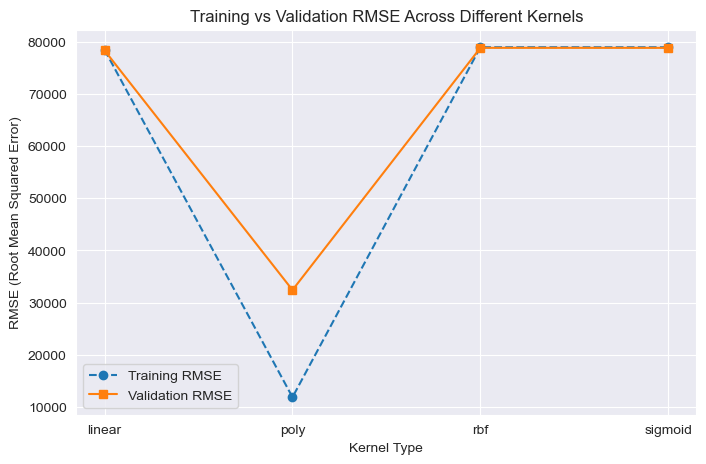

In [115]:
# Convert GridSearchCV results to DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Extract unique kernel types from GridSearchCV results
kernels = ["linear", "poly", "rbf", "sigmoid"]

# Initialize lists to store RMSE for each kernel with fixed hyperparameters
train_rmse = []
val_rmse = []

# Loop through each kernel and extract RMSE for the specified hyperparameters
for kernel in kernels:
    # Filter results for the specific kernel with fixed hyperparameters
    kernel_results = cv_results[
        (cv_results["param_svm__kernel"] == kernel) &
        (cv_results["param_svm__C"] == 0.1) &
        (cv_results["param_svm__epsilon"] == 1) &
        (cv_results["param_svm__gamma"] == 1)
    ]
    
    # Compute mean RMSE for training and validation (negate because GridSearchCV minimizes negative RMSE)
    train_rmse.append(-kernel_results["mean_train_score"].mean())
    val_rmse.append(-kernel_results["mean_test_score"].mean())

# Plot Training and Validation RMSE
plt.figure(figsize=(8, 5))
plt.plot(kernels, train_rmse, marker='o', linestyle='--', label="Training RMSE")
plt.plot(kernels, val_rmse, marker='s', linestyle='-', label="Validation RMSE")

plt.xlabel("Kernel Type")
plt.ylabel("RMSE (Root Mean Squared Error)")
plt.title("Training vs Validation RMSE Across Different Kernels")
plt.legend()
plt.grid(True)
plt.show()

# Summary - Model Performance Comparison: RMSE (With & Without PCA)  

This table compares the **Root Mean Squared Error (RMSE)** for different models trained **with and without PCA**.  

| Model                   | RMSE (With PCA) | RMSE (Without PCA) |
|-------------------------|-----------------|--------------------|
| **Random Forest**       | 30,452.14       | 29,048.09         |
| **KNN (Bagging)**       | 48,602.15       | 36,572.26         |
| **Gradient Boosting**   | 27,790.44         | N/A               |
| **SVM (Best Model)**    | N/A             | 25,990.74               |

## Key Insights  
- **Random Forest performed slightly better without PCA**, suggesting that the original numerical features retained valuable information.  
- **KNN with Bagging performed significantly worse with PCA**, indicating PCA may have lost important feature relationships.  
- **SVM achieved the lowest RMSE (`25,990.74`) but was only tested without PCA**.   
- **Overall, PCA did not consistently improve performance**.


---
### Submission

In [116]:
# Load test dataset
test_df = pd.read_csv('test.csv')

# Fill missing numeric values with median
numeric_cols = test_df.select_dtypes(include=['number'])
test_df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())

# Fill missing categorical values with the most frequent value
remaining_categorical_cols = test_df.select_dtypes(include=['object']).columns
test_df[remaining_categorical_cols] = test_df[remaining_categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Ensure column consistency with training data
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

# Apply the same preprocessing pipeline to test data
X_test_final = test_df  # Keep only features (ensure consistency with training data)
y_test_pred = best_model.predict(X_test_final)

# Create a submission DataFrame
submission = pd.DataFrame({
    "Id": test_df["Id"],  # Ensure ID column is preserved
    "SalePrice": y_test_pred  # Predictions from the best model
})

# Save to CSV (without index)
submission.to_csv('submission.csv', index=False)

print("Submission file saved: submission.csv")

Submission file saved: submission.csv


# Bibliography  

1. Saul Stavo. *Predicting House Prices Using Stacking.* Kaggle, 2024. Available at: [Kaggle Notebook](https://www.kaggle.com/code/saulstavo/predicting-house-prices-using-stacking)  